# Helicopter Escapes

## Questions im attempting to answer:
>In which year did the most attempts at breaking out of prison with a helicopter occur?

>In which countries do the most attempted helicopter prison escapes occur?

# Importing and Cleaning Data

#### We begin my importing some helper functions and matplotlib

In [101]:
from helper import *
import matplotlib.pyplot as plt

#### Now, let's get the data from the [List of helicopter prison escapes](https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes) Wikipedia article.

In [102]:
url = 'https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes'
data = data_from_url(url)

#### Lets print the first three rows

In [103]:
data_first_three = data[:3]

for i in data_first_three:
    print(i)
    print('')

['August 19, 1971', 'Santa Martha Acatitla', 'Mexico', 'Yes', 'Joel David Kaplan Carlos Antonio Contreras Castro', "Joel David Kaplan was a New York businessman who had been arrested for murder in 1962 in Mexico City and was incarcerated at the Santa Martha Acatitla prison in the Iztapalapa borough of Mexico City. Joel's sister, Judy Kaplan, arranged the means for to help Kaplan escape, and on August 19, 1971, a helicopter landed in the prison yard. The guards mistakenly thought this was an official visit. In two minutes, Kaplan and his cellmate Carlos Antonio Contreras, a Venezuelan counterfeiter, were able to board the craft and were piloted away, before any shots were fired.[9] Both men were flown to Texas and then different planes flew Kaplan to California and Castro to Guatemala.[3] The Mexican government never initiated extradition proceedings against Kaplan.[9] The escape is told in a book, The 10-Second Jailbreak: The Helicopter Escape of Joel David Kaplan.[4] It also inspired 

#### Lets remove the details column, so its not so cluttered

In [104]:
index = 0

for row in data:
    row.remove(row[-1])
    data[index] = row
    index += 1

#### Lets print a few rows, to make sure everything went smoothly.

In [105]:
for row in data_first_three:
    print(row)

['August 19, 1971', 'Santa Martha Acatitla', 'Mexico', 'Yes', 'Joel David Kaplan Carlos Antonio Contreras Castro']
['October 31, 1973', 'Mountjoy Jail', 'Ireland', 'Yes', "JB O'Hagan Seamus TwomeyKevin Mallon"]
['May 24, 1978', 'United States Penitentiary, Marion', 'United States', 'No', 'Garrett Brock TrapnellMartin Joseph McNallyJames Kenneth Johnson']


#### Now lets change the dates to only their years, using the fetch_year() helper function.

In [106]:
for row in data:
    row[0] = fetch_year(row[0])

#### Again, lets print a few rows, to make sure everything went smoothly.

In [107]:
for row in data_first_three:
    print(row)

[1971, 'Santa Martha Acatitla', 'Mexico', 'Yes', 'Joel David Kaplan Carlos Antonio Contreras Castro']
[1973, 'Mountjoy Jail', 'Ireland', 'Yes', "JB O'Hagan Seamus TwomeyKevin Mallon"]
[1978, 'United States Penitentiary, Marion', 'United States', 'No', 'Garrett Brock TrapnellMartin Joseph McNallyJames Kenneth Johnson']


#### Finding min and max years, as well as making a list of years in data

In [108]:
min_year = min(data, key=lambda x: x[0])[0]
max_year = max(data, key=lambda x: x[0])[0]

years = []
for y in range(min_year, max_year + 1):
    years.append(y)

#### We remove any duplicate years in the data, and then append a list of attempts per year. We will add these attempts in the next step.

In [109]:
unique_years = []
attempts_per_year = []
for i in years:
    count = unique_years.count(i)
    if count == 0:
        unique_years.append(i)
    else:
        continue
for i in unique_years:
    attempts_per_year.append([i,0])

# Analysis

#### Now we can count the attempts made to escape per year

In [110]:
for row in data:
    for ya in attempts_per_year:
        y = ya[0]
        if row[0] == y:
            ya[1] += 1
print(attempts_per_year)

[[1971, 1], [1972, 0], [1973, 1], [1974, 0], [1975, 0], [1976, 0], [1977, 0], [1978, 1], [1979, 0], [1980, 0], [1981, 2], [1982, 0], [1983, 1], [1984, 0], [1985, 2], [1986, 3], [1987, 1], [1988, 1], [1989, 2], [1990, 1], [1991, 1], [1992, 2], [1993, 1], [1994, 0], [1995, 0], [1996, 1], [1997, 1], [1998, 0], [1999, 1], [2000, 2], [2001, 3], [2002, 2], [2003, 1], [2004, 0], [2005, 2], [2006, 1], [2007, 3], [2008, 0], [2009, 3], [2010, 1], [2011, 0], [2012, 1], [2013, 2], [2014, 1], [2015, 0], [2016, 1], [2017, 0], [2018, 1], [2019, 0], [2020, 1]]


#### Lets see that visualized in a simple chart below:

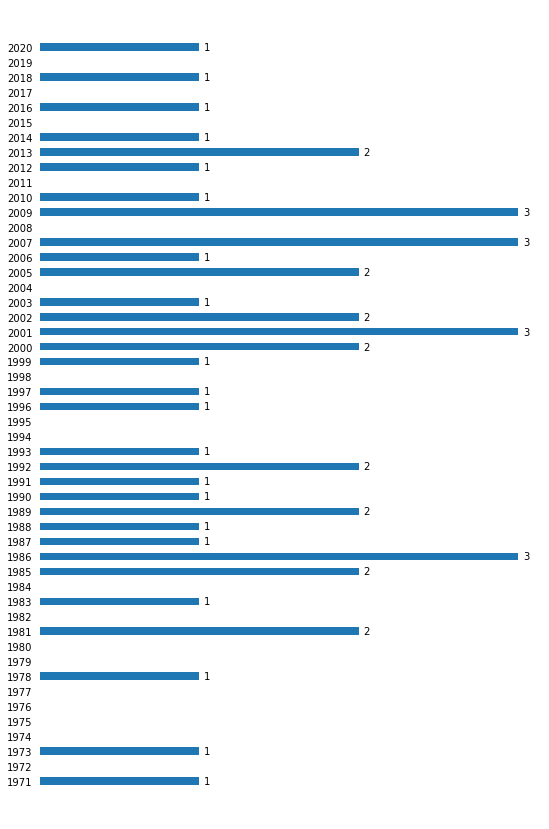

In [111]:
%matplotlib inline
barplot(attempts_per_year)

#### We now can answer the question **In which year did the most attempts at breaking out of prison with a helicopter occur?**

#### Answer: 1986, 2001, 2007, and 2009 are all tied for 3 attempts

#### Lets work on the 2nd question: **In which countries do the most attempted helicopter prison escapes occur?**

In [112]:
countries_frequency = df["Country"].value_counts()
print(countries_frequency)

France            15
United States      8
Canada             4
Greece             4
Belgium            4
Australia          2
Brazil             2
United Kingdom     2
Mexico             1
Ireland            1
Italy              1
Puerto Rico        1
Chile              1
Netherlands        1
Russia             1
Name: Country, dtype: int64


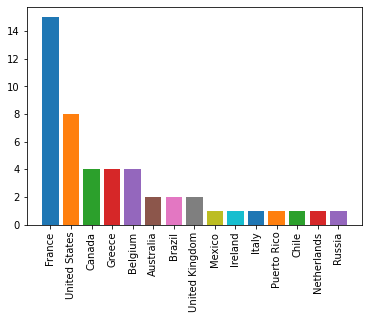

In [113]:
for i, j in countries_frequency.items():
    plt.bar(i,j)
    plt.xticks(rotation = 90)
plt.show()

#### Answer: France by a longshot has the most attempted helicopter prison escapes.

#### Now lets check out: **In which countries do helicopter prison breaks have a higher chance of success?**

#### We will calculate this by counting the number of sucesses, and divde them by total attempts (number of occurances)

#### wins / attempts = win %

In [114]:
success_frequency_overall = df['Succeeded'].value_counts()
wins = success_frequency_overall[0]
losses = success_frequency_overall[1]
total = wins + losses

win_percentage_total = wins / total
print('The overall success rate of attempted escapes is: {:.2f}%'.format(win_percentage_total * 100))

The overall success rate of attempted escapes is: 70.83%


In [115]:
success_per_country = {} #{'Country': [fails, success]}

for row in data:
    country = row[2]
    if country in success_per_country:
        if row[3] == 'Yes':
            success_per_country[country][1] = success_per_country[country][1] + 1
        else:
            success_per_country[country][0] = success_per_country[country][0] + 1
    else:
        success_per_country[country] = [0,0]
        if row[3] == 'Yes':
            success_per_country[country][1] = success_per_country[country][1] + 1
        else:
            success_per_country[country][0] = success_per_country[country][0] + 1
print(success_per_country)

{'Mexico': [0, 1], 'Ireland': [0, 1], 'United States': [2, 6], 'France': [4, 11], 'Canada': [1, 3], 'Australia': [1, 1], 'Brazil': [0, 2], 'Italy': [0, 1], 'United Kingdom': [1, 1], 'Puerto Rico': [0, 1], 'Chile': [0, 1], 'Netherlands': [1, 0], 'Greece': [2, 2], 'Belgium': [2, 2], 'Russia': [0, 1]}


*A quick side calculation out of curiosity that totals the success rate for all other countries combines, vs united states and france*

In [116]:
no_f_no_u = success_per_country.copy()
no_f_no_u.pop('United States')
no_f_no_u.pop('France')
nfnu_wins = 0
nfnu_losses = 0

for value in no_f_no_u.values():
    nfnu_wins += value[1]
    nfnu_losses += value[0]
nfnu_total_attempts = nfnu_wins + nfnu_losses

us_f_wins = success_per_country['United States'][1] + success_per_country['France'][1]
us_f_losses = success_per_country['United States'][0] + success_per_country['France'][0]
us_f_totals = us_f_wins + us_f_losses
print("Total countries attempts, excluding the US and France, hold a: {:.2f}% success rate with {} total occurences".format((nfnu_wins / nfnu_total_attempts) * 100, nfnu_total_attempts))
print("Total of United States and France alone: {:.2f}% success rate {} total occurences".format((us_f_wins / us_f_totals) * 100, us_f_totals))
print()    

Total countries attempts, excluding the US and France, hold a: 68.00% success rate with 25 total occurences
Total of United States and France alone: 73.91% success rate 23 total occurences



#### Lets graph the wins vs successes

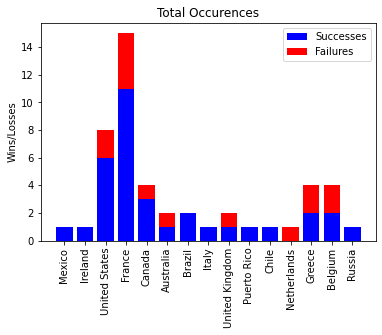

In [117]:
country_names = list(success_per_country.keys())
successes = [i[1] for i in success_per_country.values()]
failures = [i[0] for i in success_per_country.values()]

plt.bar(country_names, successes, label = 'Successes',color = 'blue')
plt.bar(country_names, failures, bottom = successes, label = 'Failures', color = 'red')
plt.xticks(rotation = 90)
plt.ylabel('Wins/Losses')
plt.title('Total Occurences')
plt.legend()
plt.show()

#### Now we calculate our win rate calculation for each of our countries.

In [118]:
win_rate_per_country = {}
for key,values in success_per_country.items():
    win_rate_per_country[key] = (values[1]/ (values[1] + values[0])) * 100
print(win_rate_per_country)

{'Mexico': 100.0, 'Ireland': 100.0, 'United States': 75.0, 'France': 73.33333333333333, 'Canada': 75.0, 'Australia': 50.0, 'Brazil': 100.0, 'Italy': 100.0, 'United Kingdom': 50.0, 'Puerto Rico': 100.0, 'Chile': 100.0, 'Netherlands': 0.0, 'Greece': 50.0, 'Belgium': 50.0, 'Russia': 100.0}


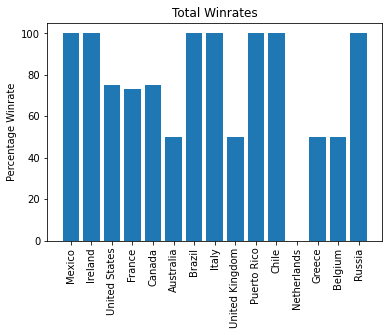

In [119]:
countries_bar_plot = win_rate_per_country.keys()
win_percentage_bar_plot = win_rate_per_country.values()
plt.bar(countries_bar_plot,win_percentage_bar_plot)
plt.xticks(rotation = 90)
plt.title("Total Winrates")
plt.ylabel("Percentage Winrate")
plt.show()

#### The problem with the above chart is that it doesnt give us a proper idea of what countries have a higher success rate. The 75% winrate of the United States doesnt seem great, until you notice that **all** of the 100% success rate countries have only had 1 or 2 attempts, whereas the united states have had 8 total attempts. Lets see if we can visualize this data better

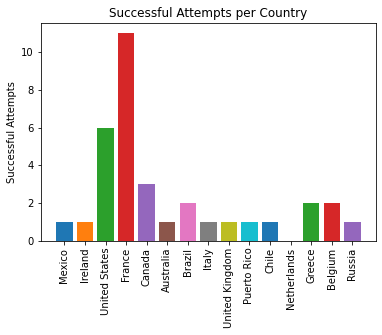

In [120]:
country_occ_totals = {}
for key,value in success_per_country.items():
    plt.bar(key, value[1])
plt.xticks(rotation = 90)
plt.ylabel('Successful Attempts')
plt.title('Successful Attempts per Country')
plt.show()

#### This is a little better view. We can see that most countries hover around 1-3 successful attempts. But France stands far and above everyone else with a 73% success rate with 11 total successes, and the United States being the only close runner up with a 75% success rate with 6 total successes. To me this means that if youre locked up in France, youd have a much higher chance of a successful escape.

*Since france has more total occurences than the united states, the winrate stands a bit stronger, even though the united states win rate is better. This idea should come intuitively, as we can easily see the instability of 1 or 2 attempts. There just isnt enough data to tell. More data equals stronger evidence AKA Law of Large Numbers (generally)*

# Conclusions
>In which year did the most attempts at breaking out of prison with a helicopter occur?
>> 1986, 2001, 2007, and 2009 are all tied for 3 attempts

>In which countries do the most attempted helicopter prison escapes occur?
>> France and the United States with a combined 74%~ success rate over 23 total attempts. ***All other attempts in other countries total 25, making France and the United States double the rest of the countries combined***

>Other Conclusions and Findings
>> There was an overall successrate of **70.83%** which is incredible. You have decent chances of escaping in any country really of you have a helicopter. But the most proven countries to attempt it are the US and France

>> Total countries occurences, excluding the US and France, hold a: 68.00% success rate with 25 total occurences

>> Total of United States and France alone: 73.91% success rate 23 total occurences

## Future Questions To Answer:
>How does the number of escapees affect the success?

>Which escapees have done it more than once?